## 核函数支持向量机

### 核方法

- 有两个重要作用:
    - 非线性带来高维转换 (从模型角度)
    - 对偶表示带来内积(从优化角度)
-数据转向高维: $X(input space) \to Z(feature space)$

- 在硬间隔中的二次优化中, 需要计算 $x_i^Tx_j$, 这是数据本身的内积
- 若对其进行非线性变换后, 则为 $ \phi(x_i)^T\phi(x_j)$
- 正常计算步骤中需要先计算 $ \phi(x_i)$ 和 $\phi(x_j)$后, 再计算内积
- 可以使用核方法直接计算内积: $ K(x, x') = \phi(x)^T\phi(x')$
- 核函数是正定的

### 核函数

- 映射 的过程也就是通过核函数转换的过程

- 核函数就是将数据点从低维度空间转换到高维度空间的方法, 并能大大降低计算的复杂度

- 线性核函数：
$$k\left ( x_i, x_j \right )=x_i*x_j$$
- 多项式核函数：
$$k\left ( x_i, x_j \right )=\left ( x_i*x_j \right )^d, d \geq 1$$
- 高斯径向基核函数：
$$k\left(x_{i}, x_{j}\right)=\exp
                    \left(-\frac{\left\|\mathbf{x}_{\mathrm{i}}-\mathbf{x}_{\mathrm{j}}\right\|_{2}^{2}}{2
                    \sigma^{2}}\right)=\exp \left(-\gamma
                    *\left\|x_{i}-x_{j}\right\|_{2}^{2}\right), \gamma>0
                    \tag{rbf}$$

- Sigmoid 核函数：
$$k\left(x_{i}, x_{j}\right)=\tanh \left(\beta * x_{i} x_{j}+\theta\right), \beta>0, \theta<0$$

### 代码

Text(0.5, 0, 'r')

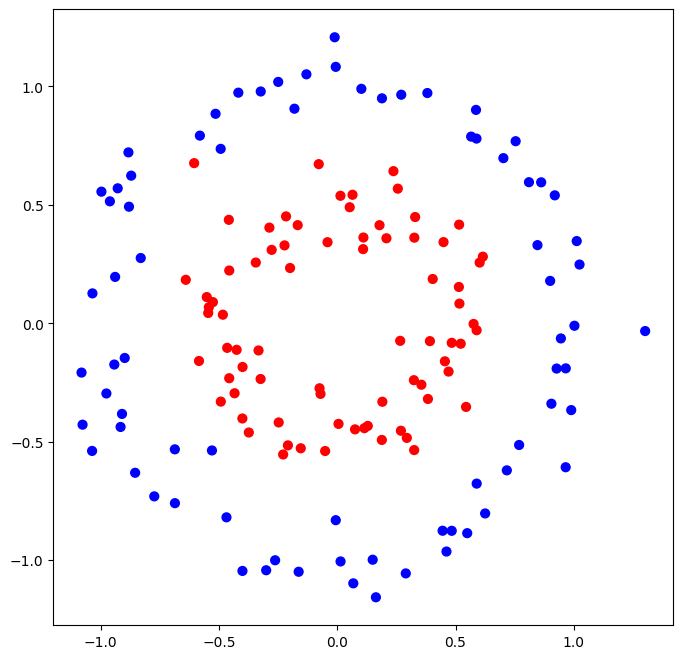

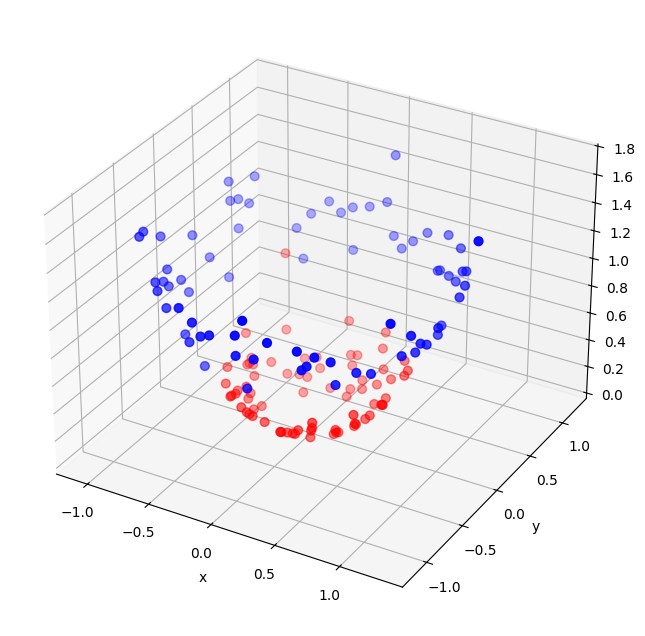

In [4]:
from sklearn.datasets import make_circles
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
import numpy as np

%matplotlib inline


x2, y2 = make_circles(150, factor=0.5, noise=0.1, random_state=30)  # 生成示例数据

plt.figure(figsize=(8, 8))  # 绘图
plt.scatter(x2[:, 0], x2[:, 1], c=y2, s=40, cmap="bwr")

def kernel_function(xi, xj):
    poly = xi**2 + xj**2
    return poly



r = kernel_function(x2[:, 0], x2[:, 1])
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection="3d")
ax.scatter3D(x2[:, 0], x2[:, 1], r, c=y2, s=40, cmap="bwr")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("r")

#### 高斯核

In [ ]:
rbf_svc = SVC(kernel="rbf", gamma="auto")

def svc_plot(model):
    # 获取到当前 Axes 子图数据，并为绘制分割线做准备
    ax = plt.gca()
    x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 50)
    y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 50)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # 使用轮廓线方法绘制分割线``
    ax.contour(X, Y, P, colors="green", levels=[-1, 0, 1], linestyles=["--", "-", "--"])

    # 标记出支持向量的位置
    ax.scatter(
        model.support_vectors_[:, 0], model.support_vectors_[:, 1], c="green", s=100
    )

def change_c(c):
    rbf_svc.C = c
    rbf_svc.fit(x2, y2)
    plt.figure(figsize=(8, 8))
    plt.scatter(x2[:, 0], x2[:, 1], c=y2, s=40, cmap="bwr")
    svc_plot(rbf_svc)


interact(change_c, c=[1, 100, 10000])

#### 练习

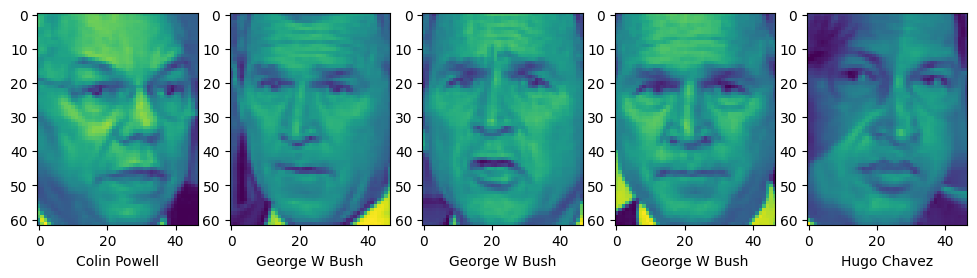

In [11]:
from sklearn.datasets import fetch_lfw_people
from matplotlib import pyplot as plt
%matplotlib inline
# import os
# os.environ['http_proxy'] = 'http://127.0.0.1:8197'
# os.environ['https_proxy'] = 'http://127.0.0.1:8197'

# 加载数据集
faces = fetch_lfw_people(min_faces_per_person=60)
faces.target_names, faces.images.shape



### 代码开始 ### (≈4 行代码)
fig, axes = plt.subplots(1, 5, figsize=(12, 6))
for i, image in enumerate(faces.images[:5]):
    axes[i].imshow(image)
    axes[i].set_xlabel(faces.target_names[faces.target[i]])
### 代码结束 ###

In [12]:
faces.data.shape

(1348, 2914)

In [13]:
from sklearn.decomposition import PCA

# 直接运行，将数据特征缩减为 150 个
pca = PCA(n_components=150, whiten=True, random_state=42)
pca_data = pca.fit_transform(faces.data)
pca_data.shape

(1348, 150)

In [14]:
from sklearn.model_selection import train_test_split

### 代码开始 ### (≈1 行代码)
X_train, X_test, y_train, y_test = train_test_split(
    pca_data, faces.target, test_size=0.2, random_state=42)
### 代码结束 ###

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1078, 150), (270, 150), (1078,), (270,))

In [15]:
### 代码开始 ### (≈4 行代码)
from sklearn.svm import SVC

model = SVC(C=10, gamma=0.001)
model.fit(X_train, y_train)
model.score(X_test, y_test)
### 代码结束 ###

0.8296296296296296